<a href="https://colab.research.google.com/github/Arifuzzaman-Munaf/Data-Visualization-Python/blob/main/pie_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [What is Pie Chart?](#scrollTo=yGD63aulfLYT&line=11&uniqifier=1)<br>
2.  [Install dependencies and import libraries](#scrollTo=yGD63aulfLYT&line=11&uniqifier=1)<br>
3.  [Dataset : Most Streamed Spotify Songs 2023](#scrollTo=YBy5I6b8xc-s&line=2&uniqifier=1) <br>
4.  [Exploring and Analyzing the Dataset](#scrollTo=FkBBLNEa4Cyi&line=1&uniqifier=1) <br>
5.  [Task 1 : Top 10 Artists by Number of Songs](#scrollTo=IOwLTO_O8KcM&line=5&uniqifier=11) <br>
6.  [Task 2 : Distribution of musical keys in the dataset](#scrollTo=ntZOZiMnV94t&line=3&uniqifier=1)

</div>


# What is Pie Chart?
A pie chart is a circular diagram that represents data as slices of a “pie,” where each slice’s size shows what proportion or percentage it holds of the total. It is commonly used to visualize the relative contribution of different categories to an entire dataset. Each slice corresponds to one category, and its arc length (or area) indicates the magnitude or frequency of that category relative to the sum of all categories. <br>

**Use Cases**
* Understanding how data is distributed across categories.
* Identifying patterns, skews, or anomalies that need attention.
* Comparing the frequency of different categories to spot trends.
* Optimizing resource allocation by revealing imbalances.


*In this lab, we will focus on several real life examples on how to use pie charts using a real world dataset. We will also experiment with difference attributes of pie chart for better visualization.*

# Install dependencies and import libraries


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

* The line **`plt.style.use('ggplot')`** is used to change the visual style of plots created using the matplotlib.pyplot module.
* **`%matplotlib inline`** ensures that plots generated by Matplotlib are displayed directly within the Jupyter Notebook, instead of opening in separate windows. This makes your visualizations easily viewable and integrated into your notebook's workflow.

# Dataset : Most Streamed Spotify Songs 2023
The Most Streamed Spotify Songs 2023” dataset on Kaggle provides a detailed compilation of the year’s most popular tracks on Spotify, including artist names, track titles, and various audio features. Ideal for research in music trends and consumer preferences, this dataset supports a range of analytical applications from market analysis to algorithm refinement.
<br>
For further details and to access the dataset, please refer to the [Kaggle dataset page](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023?select=spotify-2023.csv).

In [3]:
dataset = pd.read_csv('spotify-2023.csv', encoding='latin1')
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**`encoding='latin1'`** Specifies the character encoding used to read the file. Latin-1 (ISO-8859-1) is often used to handle special characters (such as accented letters) that may cause encoding errors with the default UTF-8.If the dataset contains special characters (e.g., é, ñ, ü), using UTF-8 may cause errors like:

	utf-8' codec can't decode bytes in position 7250-7251: invalid continuation byte

**Alternative Encodings:**
*	utf-8: Default, but may fail if the dataset contains non-UTF-8 characters.
*	ISO-8859-1 (latin1): Can handle a wider range of special characters without errors.
*	cp1252: Used in Windows for similar encoding compatibility.


# Exploring and Analyzing the Dataset

In [4]:
dataset.shape #shape of a dataset refers to the number of rows and columns it contains

(953, 24)

In [5]:
dataset.info() #Helps detect missing values and incorrect data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

We can see that the dataset contains 953 rows and 24 columns. In 24 columns,    **`in_shazam_charts`** and **`key`** columns has some null values according to the info shown above. Therefore, we will check the sum of null values in both columns to further analyse the dataset.

In [6]:
dataset.isnull().sum() #Returns the count of missing values per column.

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


We can see that **`Key`** column has 95 **`null`** entries and **`in_shazam_charts `** has 50 **`null`** entries describing less than 10% of total values are **`null`** in both **`Key`** and **`in_shazam_charts `** columns. Therefore, we can drop the **`null`** values and further work with the rest of values.<br>
If a column has a high number of missing values, you may:
*	Drop the column if it’s not useful.
*	Fill missing values using mean, median, or mode.



# Task 1 : Top 10 Artists by Number of Songs
In this task, we will  visalize a pie chart to show,
how the distribution of songs among the top 10 artists in the dataset reflect s their dominance in the Spotify streaming charts for 2023?

Before we start plotting, we should know about some attributes that are going to be used in this task.
>* **`autopct`** Formats the numerical values within the pie slices to display percentages with two decimal places, providing precise information on the proportion of songs by each artist.
* **`startangle`** Rotates the start of the pie chart to 90 degrees, which places the first pie slice at the top, making the chart easier to read.
* **`shadow`** Adds a shadow beneath each slice, enhancing the visual depth and making the chart more aesthetically pleasing.
* **`bbox_to_anchor`** Adjusts the position of the legend outside the main plot area. The coordinates (1, 0.7) place the legend to the right of the pie chart, ensuring it does not overlap with the data visualization.


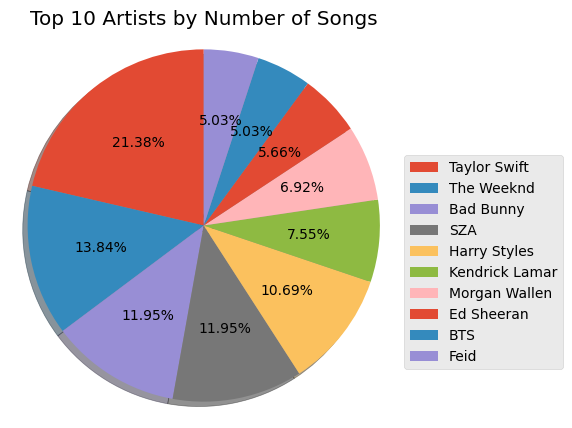

In [7]:
# Get the top 10 most featured artists in the dataset based on the number of songs
top_artists = dataset['artist(s)_name'].value_counts().nlargest(10)

plt.figure(figsize=(5, 5))  # Set the figure size to 5x5 inches for better visualization

# Create a pie chart for the top 10 artists
plt.pie(
    top_artists,
    autopct='%1.2f%%',  # Display percentage values with two decimal place
    startangle=90,  # Rotate the pie chart to start from the top
    shadow=True  # Add a shadow effect for better visual distinction
)

plt.axis('equal')  # Ensure the pie chart is displayed as a perfect circle
plt.title('Top 10 Artists by Number of Songs')  # Add a meaningful title
plt.legend(labels=top_artists.index, bbox_to_anchor=(1, 0.7))  # Add a legend with artist names
plt.show()  # Display the final pie chart

# Task 2 : Distribution of musical keys in the dataset
In this task, we will visualize a pie chart showing the distribution of musical keys based on **`Key`** column.

The “key” column in the dataset represents the musical key in which a song is composed. The musical key determines the tonal center of the track and is an essential aspect of music theory.The key column typically contains musical note names such as C, C#, D, D#, E, F, F#, G, G#, A, A#, B.
<br>
***`Why is the Key Column Important?`***
*	**Music Analysis:** Helps in finding patterns in popular music, such as whether major or minor keys dominate the charts.
*	***DJ & Music Production:*** DJs use key information for harmonic mixing, ensuring smooth transitions between songs.
*	***Music Recommendations:*** Platforms like Spotify use key and mode to suggest similar-sounding tracks.


In [8]:
# Get the group-wise music counts based on their musical Key
key_counts = dataset['key'].value_counts()
key_counts #Show the Key-wise music count

,count
key,
C#,120
G,96
G#,91
F,89
B,81
D,81
A,75
F#,73
E,62


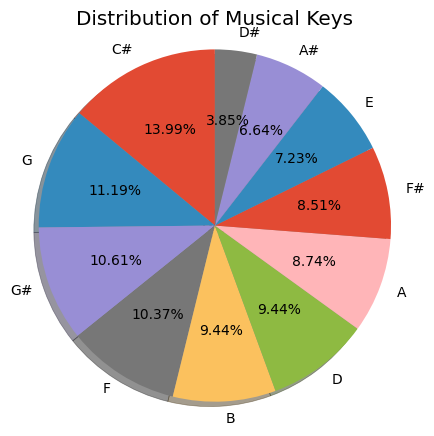

In [9]:
plt.figure(figsize=(5, 5)) # Set the figure size to 5x5 inches for better visualization

# Create a pie chart for the distribution of musical keys
plt.pie(
    key_counts,
    labels=key_counts.index, # Set musical key names as labels,
    autopct='%1.2f%%', # Display percentage values with two decimal place
    startangle=90, # Rotate the pie chart to start from the top
    shadow=True # Add a shadow effect for better visual distinction
)

plt.axis('equal') # Ensure the pie chart is displayed as a perfect circle
plt.title('Distribution of Musical Keys') # Add a meaningful title
plt.show()

Hmm...! It looks okay! but we can create a better pie.<br> Let's play with some more attributes to improve its visuals. We will maily focus on the following attributes :


> * ***`pctdistance`*** : Controls the distance of the percentage labels from the center of the pie.
* ***`explode`*** : Uses the provided list to determine the offset for each pie slice.
* ***`plt.legend()`*** : Adds a legend to the chart to help identify what each pie slice represents.
    * ***`labels`***= display the label of category or group in pie chart.
    * ***`loc`*** : defines the position of the legend. There are 11 possible locations(shown in table), which can be specified using either numeric values or string labels.
    * ***`fontsize`*** :  Sets the font size of the legend text.

# Matplotlib Legend `loc` Parameter Values
| `loc` String | Equivalent Integer | Position |
|--------------|-------------------|----------|
| `'best'`  | 0  | Automatically selects the best location |
| `'upper right'` | 1 | Upper Right |
| `'upper left'`  | 2 | Upper Left |
| `'lower left'`  | 3 | Lower Left |
| `'lower right'` | 4 | Lower Right |
| `'right'`  | 5 | Right |
| `'center left'`  | 6 | Center Left |
| `'center right'` | 7 | Center Right |
| `'lower center'` | 8 | Lower Center |
| `'upper center'` | 9 | Upper Center |
| `'center'`  | 10 | Center |


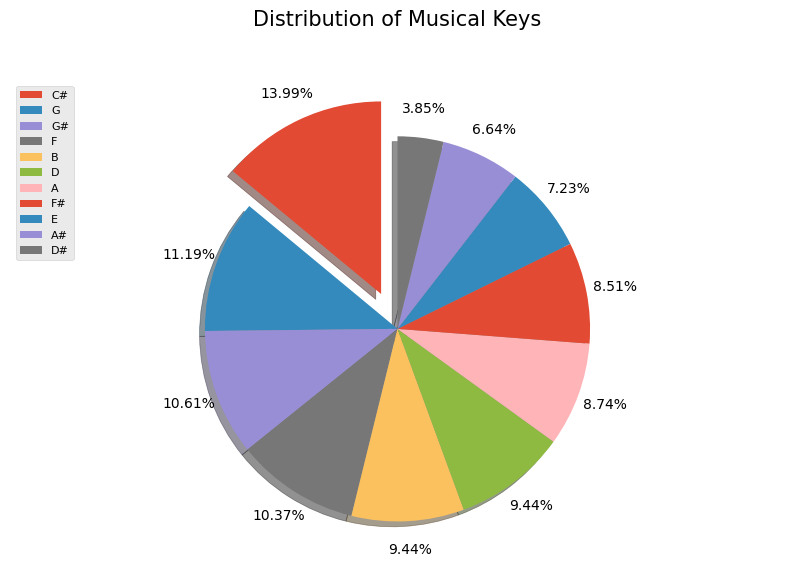

In [10]:
"""
"explode_list" specifies how much each pie slice (representing different musical keys) is offset from the center of the pie chart.
[0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] – Only the first slice is offset by a factor of 0.2, making it stand out from the others.
"""
explode_list = [0.2, 0, 0, 0, 0, 0,0, 0, 0, 0, 0]

plt.figure(figsize=(10,6))

plt.pie(
    key_counts,
    autopct='%1.2f%%', # Display percentage values with two decimal place
    startangle=90, # Rotate the pie chart to start from the top
    shadow=True, # Add a shadow effect for better visual distinction
    pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct
    explode=explode_list, # Offset each wedge by the specified ratio
)

plt.legend(labels=key_counts.index, loc='upper left', fontsize='8') # Add a legend with musical key names
plt.axis('equal') # Ensure the pie chart is displayed as a perfect circle
plt.title('Distribution of Musical Keys', y=1.1, fontsize = 15) # Add a meaningful title
plt.show()

# Author
[Md. Arifuzzaman Munaf](https://www.linkedin.com/in/arifuzzaman-munaf/)